In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data      = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rescale=1./255,shear_range=0.02,zoom_range=0.02,)
test_data       = ImageDataGenerator(rescale=1./255)

In [3]:
train_x_y = train_data.flow_from_directory(directory= r'C:\Users\ANANTHU\Desktop\solar\dataset1\training_set',
                                           target_size=(64, 64),
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           batch_size=32,
                                           interpolation="bicubic",)
test_x_y = test_data.flow_from_directory(directory= r'C:\Users\ANANTHU\Desktop\solar\dataset1\test_set',
                                           target_size=(64, 64),
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           batch_size=32,
                                           interpolation="bicubic",)

Found 169 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [4]:
(train_x_y.class_indices),(test_x_y.class_indices)

({'Defective': 0, 'Non-Defective': 1}, {'Defective': 0, 'Non-Defective': 1})

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# Initialising the CNN
base_model = Sequential()
# Step 1 - Convolution
base_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64,64,3))) 
# Step 2 - Pooling
base_model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a second convolutional layer
base_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a third convolutional layer
base_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
# Step 3 - Flattening
base_model.add(Flatten())
# Step 4 - Full connection
base_model.add(Dense(256, activation='relu'))
base_model.add(Dense(128, activation='relu'))
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(32, activation='relu'))

base_model.add(Dense(2, activation='sigmoid'))

In [7]:
base_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [9]:
from keras.callbacks import ModelCheckpoint

In [10]:
checkpoint = ModelCheckpoint('best_model_improved.h5',
                            monitor = 'val_loss',
                            verbose = 1,
                            save_best_only= True,
                            mode='auto')

In [11]:
history = base_model.fit(train_x_y,
                    batch_size=32,
                    epochs=250,
                    verbose=1,
                    validation_data=test_x_y,
                    callbacks=[checkpoint])

Epoch 1/250
6/6 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.5444
Epoch 00001: val_loss improved from inf to 0.71117, saving model to best_model_improved.h5
6/6 [==============================] - 22s 2s/step - loss: 0.6993 - accuracy: 0.5444 - val_loss: 0.7112 - val_accuracy: 0.4048
Epoch 2/250
6/6 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5503
Epoch 00002: val_loss did not improve from 0.71117
6/6 [==============================] - 3s 531ms/step - loss: 0.6899 - accuracy: 0.5503 - val_loss: 0.7518 - val_accuracy: 0.4048
Epoch 3/250
6/6 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5444
Epoch 00003: val_loss did not improve from 0.71117
6/6 [==============================] - 3s 571ms/step - loss: 0.6926 - accuracy: 0.5444 - val_loss: 0.7173 - val_accuracy: 0.4048
Epoch 4/250
6/6 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.5858
Epoch 00004: val_loss improved from 0.71117 to 0.6

6/6 [==============================] - 4s 777ms/step - loss: 0.3586 - accuracy: 0.7929 - val_loss: 0.3903 - val_accuracy: 0.7937
Epoch 30/250
6/6 [==============================] - ETA: 0s - loss: 0.3277 - accuracy: 0.8107
Epoch 00030: val_loss improved from 0.39028 to 0.33713, saving model to best_model_improved.h5
6/6 [==============================] - 4s 754ms/step - loss: 0.3277 - accuracy: 0.8107 - val_loss: 0.3371 - val_accuracy: 0.8333
Epoch 31/250
6/6 [==============================] - ETA: 0s - loss: 0.3738 - accuracy: 0.7811
Epoch 00031: val_loss did not improve from 0.33713
6/6 [==============================] - 3s 642ms/step - loss: 0.3738 - accuracy: 0.7811 - val_loss: 0.3657 - val_accuracy: 0.8175
Epoch 32/250
6/6 [==============================] - ETA: 0s - loss: 0.3349 - accuracy: 0.8284
Epoch 00032: val_loss did not improve from 0.33713
6/6 [==============================] - 3s 558ms/step - loss: 0.3349 - accuracy: 0.8284 - val_loss: 0.7678 - val_accuracy: 0.7143
Epoch

Epoch 58/250
6/6 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9704
Epoch 00058: val_loss did not improve from 0.12680
6/6 [==============================] - 3s 504ms/step - loss: 0.0448 - accuracy: 0.9704 - val_loss: 0.2641 - val_accuracy: 0.9286
Epoch 59/250
6/6 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9704
Epoch 00059: val_loss did not improve from 0.12680
6/6 [==============================] - 3s 547ms/step - loss: 0.0618 - accuracy: 0.9704 - val_loss: 0.1474 - val_accuracy: 0.9444
Epoch 60/250
6/6 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9941
Epoch 00060: val_loss improved from 0.12680 to 0.10544, saving model to best_model_improved.h5
6/6 [==============================] - 4s 665ms/step - loss: 0.0294 - accuracy: 0.9941 - val_loss: 0.1054 - val_accuracy: 0.9762
Epoch 61/250
6/6 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9941
Epoch 00061: val_loss improved from 0.10

Epoch 87/250
6/6 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9941
Epoch 00087: val_loss did not improve from 0.01510
6/6 [==============================] - 3s 582ms/step - loss: 0.0067 - accuracy: 0.9941 - val_loss: 0.0340 - val_accuracy: 0.9841
Epoch 88/250
6/6 [==============================] - ETA: 0s - loss: 5.6444e-04 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.01510
6/6 [==============================] - 3s 572ms/step - loss: 5.6444e-04 - accuracy: 1.0000 - val_loss: 0.1248 - val_accuracy: 0.9603
Epoch 89/250
6/6 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9941
Epoch 00089: val_loss did not improve from 0.01510
6/6 [==============================] - 3s 555ms/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.1769 - val_accuracy: 0.9603
Epoch 90/250
6/6 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9822
Epoch 00090: val_loss did not improve from 0.01510
6/6 [====================

6/6 [==============================] - ETA: 0s - loss: 3.0260e-05 - accuracy: 1.0000
Epoch 00116: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 705ms/step - loss: 3.0260e-05 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9841
Epoch 117/250
6/6 [==============================] - ETA: 0s - loss: 2.4203e-05 - accuracy: 1.0000
Epoch 00117: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 706ms/step - loss: 2.4203e-05 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9841
Epoch 118/250
6/6 [==============================] - ETA: 0s - loss: 3.1432e-05 - accuracy: 1.0000
Epoch 00118: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 602ms/step - loss: 3.1432e-05 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9841
Epoch 119/250
6/6 [==============================] - ETA: 0s - loss: 1.6399e-05 - accuracy: 1.0000
Epoch 00119: val_loss did not improve from 0.00498
6/6 [==========

Epoch 145/250
6/6 [==============================] - ETA: 0s - loss: 2.2283e-06 - accuracy: 1.0000
Epoch 00145: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 575ms/step - loss: 2.2283e-06 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9841
Epoch 146/250
6/6 [==============================] - ETA: 0s - loss: 2.2593e-06 - accuracy: 1.0000
Epoch 00146: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 612ms/step - loss: 2.2593e-06 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9841
Epoch 147/250
6/6 [==============================] - ETA: 0s - loss: 2.6085e-06 - accuracy: 1.0000
Epoch 00147: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 601ms/step - loss: 2.6085e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9841
Epoch 148/250
6/6 [==============================] - ETA: 0s - loss: 1.9715e-06 - accuracy: 1.0000
Epoch 00148: val_loss did not improve from 0.00498
6

Epoch 174/250
6/6 [==============================] - ETA: 0s - loss: 1.0799e-06 - accuracy: 1.0000
Epoch 00174: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 643ms/step - loss: 1.0799e-06 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9841
Epoch 175/250
6/6 [==============================] - ETA: 0s - loss: 9.9176e-07 - accuracy: 1.0000
Epoch 00175: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 597ms/step - loss: 9.9176e-07 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9841
Epoch 176/250
6/6 [==============================] - ETA: 0s - loss: 1.6075e-06 - accuracy: 1.0000
Epoch 00176: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 649ms/step - loss: 1.6075e-06 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9841
Epoch 177/250
6/6 [==============================] - ETA: 0s - loss: 8.0625e-07 - accuracy: 1.0000
Epoch 00177: val_loss did not improve from 0.00498
6

Epoch 203/250
6/6 [==============================] - ETA: 0s - loss: 3.3364e-07 - accuracy: 1.0000
Epoch 00203: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 583ms/step - loss: 3.3364e-07 - accuracy: 1.0000 - val_loss: 0.1059 - val_accuracy: 0.9841
Epoch 204/250
6/6 [==============================] - ETA: 0s - loss: 4.8883e-07 - accuracy: 1.0000
Epoch 00204: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 524ms/step - loss: 4.8883e-07 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9841
Epoch 205/250
6/6 [==============================] - ETA: 0s - loss: 3.6115e-07 - accuracy: 1.0000
Epoch 00205: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 479ms/step - loss: 3.6115e-07 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9841
Epoch 206/250
6/6 [==============================] - ETA: 0s - loss: 3.6045e-07 - accuracy: 1.0000
Epoch 00206: val_loss did not improve from 0.00498
6

Epoch 232/250
6/6 [==============================] - ETA: 0s - loss: 2.8003e-07 - accuracy: 1.0000
Epoch 00232: val_loss did not improve from 0.00498
6/6 [==============================] - 4s 642ms/step - loss: 2.8003e-07 - accuracy: 1.0000 - val_loss: 0.1195 - val_accuracy: 0.9841
Epoch 233/250
6/6 [==============================] - ETA: 0s - loss: 1.1850e-07 - accuracy: 1.0000
Epoch 00233: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 570ms/step - loss: 1.1850e-07 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9841
Epoch 234/250
6/6 [==============================] - ETA: 0s - loss: 1.2626e-07 - accuracy: 1.0000
Epoch 00234: val_loss did not improve from 0.00498
6/6 [==============================] - 3s 576ms/step - loss: 1.2626e-07 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9841
Epoch 235/250
6/6 [==============================] - ETA: 0s - loss: 4.3451e-07 - accuracy: 1.0000
Epoch 00235: val_loss did not improve from 0.00498
6

In [12]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

In [13]:
model = load_model('best_model_improved.h5')

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
test_image = image.load_img(r'C:\Users\ANANTHU\Desktop\solar\dataset1\test_set\Non-Defective\image_0_492.jpeg')
test_image = image.smart_resize(test_image,(64,64),interpolation ='bicubic')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [43]:
y_predict= model.predict(test_image)
y_class = y_predict.argmax(axis=-1)

In [44]:
y_class

array([1], dtype=int64)

In [45]:
if y_class == 0:
    print('Defective')
else:
    print('Non-Defective')

Non-Defective


In [46]:
test_image_1 = image.load_img(r'C:\Users\ANANTHU\Desktop\solar\dataset1\test_set\Defective\image_0_4175.jpeg')
test_image_1 = image.smart_resize(test_image_1,(64,64),interpolation ='bicubic')
test_image_1 = image.img_to_array(test_image_1)
test_image_1 = np.expand_dims(test_image_1, axis = 0)

In [47]:
y_predict_1= model.predict(test_image_1)
y_class_1 = y_predict_1.argmax(axis=-1)

In [48]:
y_class_1

array([0], dtype=int64)

In [50]:
if y_class_1 == 0:
    print('Defective')
else:
    print('Non-Defective')

Defective


In [51]:
base_model.evaluate_generator(generator=train_x_y)

C:\Users\Achyut\AppData\Local\Temp/ipykernel_860/1359383737.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  base_model.evaluate_generator(generator=train_x_y)


[3.4601273455336923e-06, 1.0]

In [52]:
base_model.evaluate_generator(generator=test_x_y)

C:\Users\Achyut\AppData\Local\Temp/ipykernel_860/3492220266.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  base_model.evaluate_generator(generator=test_x_y)


[0.1603294461965561, 0.9603174328804016]

In [12]:
import matplotlib.pyplot as plt

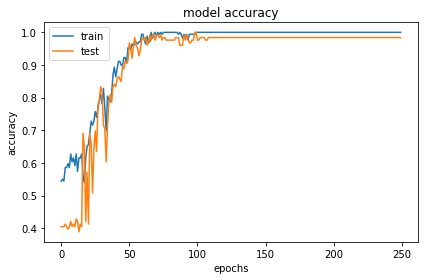

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout();

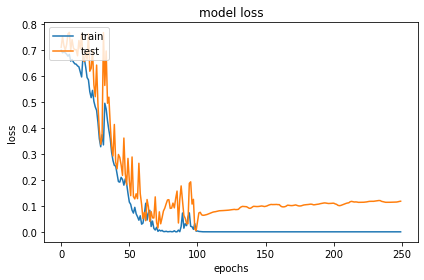

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout();